In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup



In [41]:
#Cargar los datos
dtype_spec = {
    train_df.columns[7]: 'str'
}

train_df = pd.read_csv('train.csv', dtype=dtype_spec)
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_46292/164231834.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv', dtype=dtype_spec)


In [60]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [42]:
# Mostrar las primeras filas de cada DataFrame
print(train_df.head())


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [43]:
print(test_df.head())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [44]:
print(store_df.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [45]:
# Unir los datos de la tienda con los datos de entrenamiento y prueba
train_df = train_df.merge(store_df, on='Store', how='left')
test_df = test_df.merge(store_df, on='Store', how='left')


In [46]:
# Mostrar las primeras filas después de la unión
print(train_df.head())


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [47]:
print(test_df.head())


   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4  2015-09-17   1.0      1            0              0   
1   2      3          4  2015-09-17   1.0      1            0              0   
2   3      7          4  2015-09-17   1.0      1            0              0   
3   4      8          4  2015-09-17   1.0      1            0              0   
4   5      9          4  2015-09-17   1.0      1            0              0   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   
1         a          a              14130.0                       12.0   
2         a          c              24000.0                        4.0   
3         a          a               7520.0                       10.0   
4         a          c               2030.0                        8.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0

In [48]:
#pasar nombre de columnas a minusculas y reemplazar espacios por guiones bajos
train_df.columns = [col.lower().replace(' ', '_') for col in train_df.columns]
test_df.columns = [col.lower().replace(' ', '_') for col in test_df.columns]


In [49]:
#evaluamos la presencia de valores nulos
print(train_df.isnull().sum())


store                             0
dayofweek                         0
date                              0
sales                             0
customers                         0
open                              0
promo                             0
stateholiday                      0
schoolholiday                     0
storetype                         0
assortment                        0
competitiondistance            2642
competitionopensincemonth    323348
competitionopensinceyear     323348
promo2                            0
promo2sinceweek              508031
promo2sinceyear              508031
promointerval                508031
dtype: int64


In [50]:
#evaluamos la presencia de valores nulos
print(test_df.isnull().sum())

id                               0
store                            0
dayofweek                        0
date                             0
open                            11
promo                            0
stateholiday                     0
schoolholiday                    0
storetype                        0
assortment                       0
competitiondistance             96
competitionopensincemonth    15216
competitionopensinceyear     15216
promo2                           0
promo2sinceweek              17232
promo2sinceyear              17232
promointerval                17232
dtype: int64


In [51]:
# Rellenar valores nulos en columnas de competencia
train_df['competitiondistance'].fillna(0, inplace=True)
train_df['competitionopensincemonth'].fillna(0, inplace=True)
train_df['competitionopensinceyear'].fillna(0, inplace=True)

test_df['competitiondistance'].fillna(0, inplace=True)
test_df['competitionopensincemonth'].fillna(0, inplace=True)
test_df['competitionopensinceyear'].fillna(0, inplace=True)

# Rellenar valores nulos en columnas de promoción
train_df['promo2sinceweek'].fillna(0, inplace=True)
train_df['promo2sinceyear'].fillna(0, inplace=True)
train_df['promointerval'].fillna(0, inplace=True)

test_df['promo2sinceweek'].fillna(0, inplace=True)
test_df['promo2sinceyear'].fillna(0, inplace=True)
test_df['promointerval'].fillna(0, inplace=True)

/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_46292/769476135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['competitiondistance'].fillna(0, inplace=True)
/var/folders/dk/_8pjx3z94934mw25lyqb9xkw0000gn/T/ipykernel_46292/769476135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [52]:
#mostrar los tipos de datos
print(train_df.dtypes)

store                          int64
dayofweek                      int64
date                          object
sales                          int64
customers                      int64
open                           int64
promo                          int64
stateholiday                  object
schoolholiday                  int64
storetype                     object
assortment                    object
competitiondistance          float64
competitionopensincemonth    float64
competitionopensinceyear     float64
promo2                         int64
promo2sinceweek              float64
promo2sinceyear              float64
promointerval                 object
dtype: object


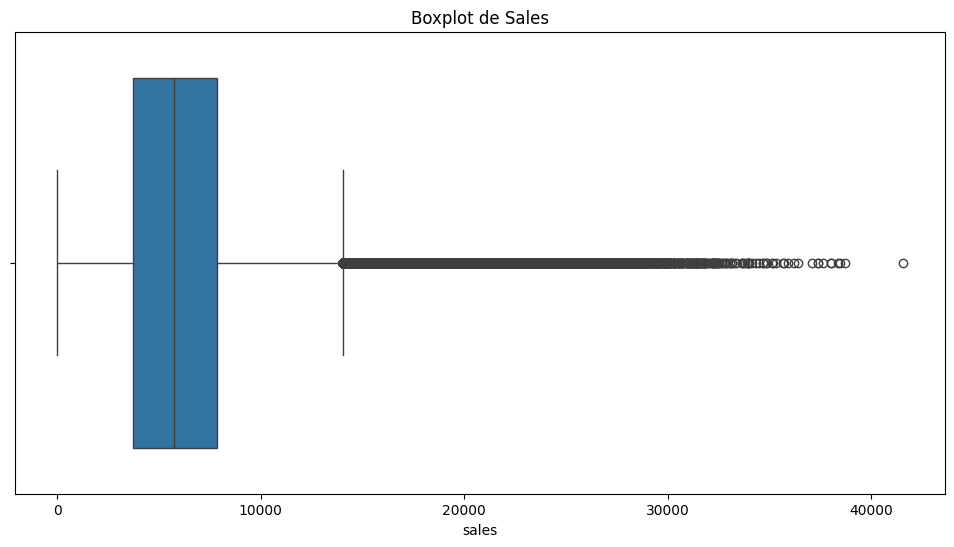

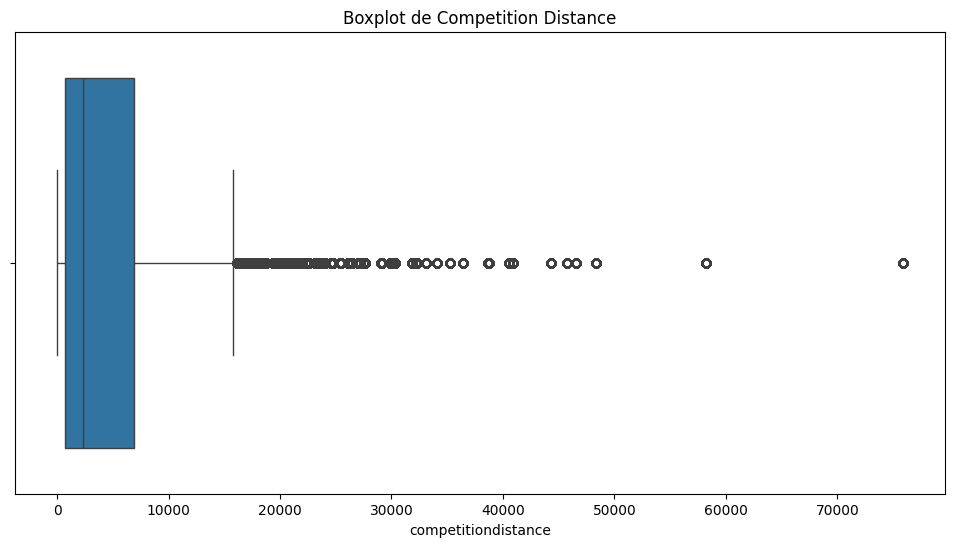

In [53]:
# Crear un boxplot para visualizar los outliers en la columna 'sales'
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['sales'])
plt.title('Boxplot de Sales')
plt.show()

# Crear un boxplot para visualizar los outliers en la columna 'competitiondistance'
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['competitiondistance'])
plt.title('Boxplot de Competition Distance')
plt.show()

In [54]:
# Convertir columnas a booleanos
train_df['promo'] = train_df['promo'].astype(bool)
train_df['promo2'] = train_df['promo2'].astype(bool)
train_df['stateholiday'] = train_df['stateholiday'].astype(bool)
train_df['schoolholiday'] = train_df['schoolholiday'].astype(bool)

test_df['promo'] = test_df['promo'].astype(bool)
test_df['promo2'] = test_df['promo2'].astype(bool)
test_df['stateholiday'] = test_df['stateholiday'].astype(bool)
test_df['schoolholiday'] = test_df['schoolholiday'].astype(bool)

In [55]:
#convertir datetime 
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [56]:
#Crear columnas adicionales para el año, mes y día
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day


In [57]:
#Crear columnas adicionales para el año, mes y día
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day


In [58]:
# URL of the weather data
url_weather = 'http://www.estesparkweather.net/archive_reports.php?date='

# Function to scrape weather data for a specific date
def scrape_weather_data(date):
    response = requests.get(url_weather + date)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract weather data (adjust according to the website's structure)
    weather_data = []
    for row in soup.find_all('tr'):
        columns = row.find_all('td')
        if columns:
            time = columns[0].text.strip()
            temperature = columns[1].text.strip()
            humidity = columns[2].text.strip()
            weather_data.append({'time': time, 'temperature': temperature, 'humidity': humidity})

    return pd.DataFrame(weather_data)


In [59]:
#loop each date of the dataset and scrape the data
weather_data = []
for date in train_df['date'].dt.strftime('%Y%m%d').unique():
    weather_data.append(scrape_weather_data(date))
    

IndexError: list index out of range